# Scientific Python Quickstart

#### [John Stachurski](http://johnstachurski.net/)

## Basic NumPy

Perhaps the single most important scientific library for Python is NumPy.  NumPy provides foundational data structures and routines on which many other libraries rely.

In [96]:
import numpy as np   

NumPy defines a basic data type called an array (actually a numpy.ndarray)

In [103]:
a = np.random.randn(3)

In [104]:
type(a)

numpy.ndarray

Compare this to a native Python list:

In [105]:
b = [0, 0, 0]

In [106]:
type(b)

list

What's the difference?

#### Shape

When we create an array such as 


In [107]:
z = np.zeros(10)

``z`` is a "flat" array with no dimension--- neither row nor column vector:

In [108]:
 z.shape

(10,)

Here the shape tuple has only one element, which is the length of the array (tuples with one element end with a comma)

To give it dimension, we can change the ``shape`` attribute 

For example, let's make it a column vector

In [109]:
z.shape = (10, 1)

In [110]:
z

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [111]:
z = np.zeros(4)
z.shape = (2, 2)
z

array([[ 0.,  0.],
       [ 0.,  0.]])

### Creating arrays

Creating empty arrays --- initializing memory:

In [112]:
z = np.empty(3)
z

array([ 1.15611752,  0.38670714, -1.3512974 ])

These are just garbage numbers --- whatever was in those memory slots

Here's how to make a regular gird sequence

In [11]:
z = np.linspace(2, 4, 5)  # From 2 to 4, with 5 elements
z

array([2. , 2.5, 3. , 3.5, 4. ])

Creating an array of ones

In [12]:
z = np.ones(3)
z

array([1., 1., 1.])

In [13]:
z = np.identity(2)
z

array([[1., 0.],
       [0., 1.]])

Arrays can be made from Python lists or tuples

In [33]:
z = np.array([10, 20]) 
z

array([10, 20])

In [34]:
z = np.array((10, 20), dtype=float) 
z

array([ 10.,  20.])

In [35]:
z = np.array([[1, 2], [3, 4]])         # 2D array from a list of lists
z

array([[1, 2],
       [3, 4]])

### Array indexing

In [17]:
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [18]:
z[0] 

1.0

In [19]:
z[-1]  

2.0

In [20]:
z[0:2]  

array([1.  , 1.25])

### Array methods

In [36]:
A = np.array((4, 3, 2, 1))
A

array([4, 3, 2, 1])

In [37]:
A.sort()

In [38]:
A

array([1, 2, 3, 4])

In [39]:
A.mean()

2.5

In [40]:
A.sum()

10

In [41]:
A.max()

4

In [42]:
A.cumsum()

array([ 1,  3,  6, 10])

In [45]:
np.cumsum(A)

array([ 1,  3,  6, 10])

What about transpose of matrices?

In [115]:
A.shape = (2, 2)
A

array([[ 2, -1],
       [ 3,  0]])

In [116]:
A.T  # Transpose, equivalent to A.transpose()

array([[ 2,  3],
       [-1,  0]])

### Operations on arrays

Standard arithmetic operations on arrays act elementwise

In [48]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

In [49]:
a + b

array([ 6,  8, 10, 12])

In [50]:
a - b

array([-4, -4, -4, -4])

In [51]:
a + 10

array([11, 12, 13, 14])

In [52]:
a.shape = 2, 2
b.shape = 2, 2

In [53]:
a

array([[1, 2],
       [3, 4]])

In [54]:
b

array([[5, 6],
       [7, 8]])

In [55]:
a * b # Pointwise multiplication!!

array([[ 5, 12],
       [21, 32]])

In [56]:
a @ b  # Matrix multiplication

array([[19, 22],
       [43, 50]])

### Comparisons

In [57]:
z = np.array([2, 3])
y = np.array([2, 3])
z == y

array([ True,  True], dtype=bool)

In [58]:
y[0] = 3
z == y

array([False,  True], dtype=bool)

In [59]:
z = np.linspace(0, 10, 5)
z

array([  0. ,   2.5,   5. ,   7.5,  10. ])

In [60]:
z > 3

array([False, False,  True,  True,  True], dtype=bool)

In [61]:
z[z > 3]  # Conditional extraction

array([  5. ,   7.5,  10. ])

## Matplotlib

Matplotlib is an outstanding plotting and visualization library for Python that interacts nicely with NumPy.  Here are a few quick examples.  We'll see more below when we discuss the SciPy library.

In [62]:
import matplotlib.pyplot as plt 

Create something to plot

In [68]:
x = np.linspace(-2, 2, 100)
y = x**2

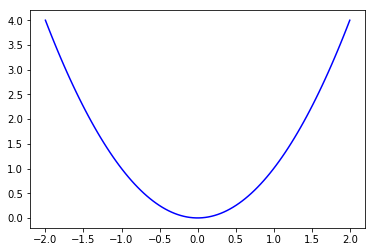

In [69]:
fig, ax = plt.subplots()  # Create axes and figure window

ax.plot(x, y, 'b-')
plt.show()

Here's a slightly more complex plot

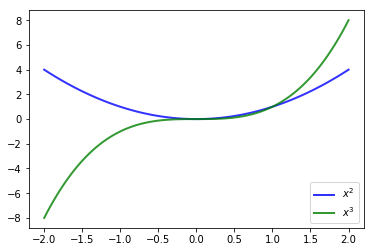

In [70]:
y3 = x**3

fig, ax = plt.subplots()  

ax.plot(x, y, 'b-', lw=2, alpha=0.8, label='$x^2$')
ax.plot(x, y3, 'g-', lw=2, alpha=0.8, label='$x^3$')

ax.legend(loc='lower right')
plt.show()

## SciPy

Let's just cover some simple examples --- references for further reading are below

### Statistics and distributions

Let's use ``scipy.stats`` to generate some data from the Beta distribution

In [50]:
from scipy.stats import beta
q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations

Now let's histogram it and compare it to the original density

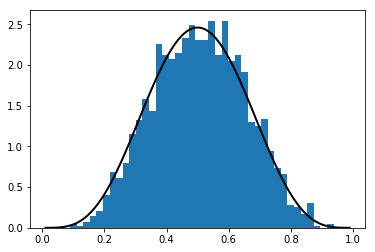

In [51]:
fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)

grid = np.linspace(0.01, 0.99, 100)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)

Other methods

In [52]:
type(q)

scipy.stats._distn_infrastructure.rv_frozen

In [54]:
q.cdf(0.5)

0.5000000000000001

In [55]:
q.pdf(0.5)

2.460937500000001

In [56]:
q.mean()

0.5

### Roots and fixed points

Let's choose an arbitrary function to work with

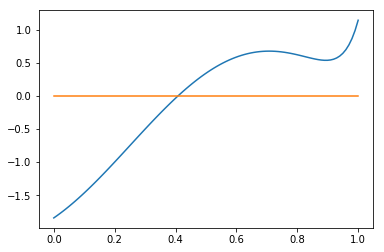

In [73]:
def f(x):
     return np.sin(4 * (x - 0.25)) + x + x**20 - 1

fig, ax = plt.subplots()

x = np.linspace(0, 1, 100)
ax.plot(x, f(x))
ax.plot(x, 0 * x)
plt.show()

In [77]:
from scipy.optimize import bisect 
bisect(f, 0, 1)

0.4082935042806639

In [79]:
from scipy.optimize import newton  
newton(f, 0.2)   # Start at initial condition x = 0.2

0.40829350427935679

In [80]:
newton(f, 0.7)   # Start at x = 0.7 instead 

0.70017000000002816

Here we see that the algorithm gets it wrong --- ``newton`` is fast but not robust

Let's try a hybrid method

In [81]:
from scipy.optimize import brentq
brentq(f, 0, 1) # Hybrid method

0.40829350427936706

In [82]:
timeit bisect(f, 0, 1)

50.6 µs ± 775 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [83]:
timeit newton(f, 0.2)

13.3 µs ± 85.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [84]:
timeit brentq(f, 0, 1)

13.5 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Note that the hybrid method is robust but still quite fast...

### Numerical optimization and integration

In [85]:
from scipy.optimize import fminbound
fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

In [86]:
from scipy.integrate import quad
integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

### Linear Algebra

Let's look at some of the most common routines from linear and matrix algebra

In [87]:
import scipy.linalg as la

We'll experiment with matrices

$$ 
  A = \begin{bmatrix} 2 & -1 \\ 3 & 0 \end{bmatrix} 
  \quad \text{and} \quad
  b = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

In [117]:
A = [[2, -1],
     [3, 0]]

A = np.array(A) # Convert from list to NumPy array

b = np.ones((2, 1))  

In [118]:
A

array([[ 2, -1],
       [ 3,  0]])

In [119]:
b

array([[ 1.],
       [ 1.]])

In [120]:
x = la.solve(A, b)  # Solve for x in Ax = b
print(x)

[[ 0.33333333]
 [-0.33333333]]


Let's check that $Ax = b$

In [121]:
A @ x

array([[ 1.],
       [ 1.]])

Let's compute the eigenvalues and eigenvectors

In [122]:
eigvals, eigvecs = la.eig(A)

In [123]:
print(f"eigenvalues = {eigvals}")

eigenvalues = [ 1.+1.41421356j  1.-1.41421356j]


In [124]:
print(f"first eigenvector = {eigvecs[:, 0]}")

first eigenvector = [ 0.28867513+0.40824829j  0.86602540+0.j        ]


### More information

* linear algebra: http://docs.scipy.org/doc/scipy/reference/linalg.html
* numerical integration: http://docs.scipy.org/doc/scipy/reference/integrate.html
* interpolation: http://docs.scipy.org/doc/scipy/reference/interpolate.html
* optimization: http://docs.scipy.org/doc/scipy/reference/optimize.html
* distributions and random number generation: http://docs.scipy.org/doc/scipy/reference/stats.html
* signal processing: http://docs.scipy.org/doc/scipy/reference/signal.html
